In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### <font color="#0000E0"> Principal Component Analysis (PCA) for the Wine Dataset </font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, linewidth=200)

winedf = pd.read_csv("wine.csv")

winedf

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Define Predictors and Target Variable
X = winedf.iloc[:, 1:].to_numpy()       # iloc selects data by index
y = winedf.loc[:, 'Class label'].to_numpy()

# Splitting Data into Training Set and Test Set
from sklearn.model_selection import train_test_split
testsize = 0.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=testsize, stratify=y, random_state=0)

# Standardizing data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100, solver='liblinear', multi_class='ovr')
lr = lr.fit(X_train_std, y_train)
lr.fit(X_train_std, y_train)
print("Training accuracy: ", lr.score(X_train_std, y_train))
print("Test accuracy: ", lr.score(X_test_std, y_test))

Training accuracy:  1.0
Test accuracy:  1.0


Fraction of variance explained by each PC = [0.37  0.184 0.118 0.073 0.064 0.051 0.04  0.026 0.024 0.016 0.014 0.012 0.008]
Cumulative fraction of variance explained = [0.37  0.554 0.672 0.745 0.81  0.86  0.9   0.926 0.95  0.966 0.98  0.992 1.   ]


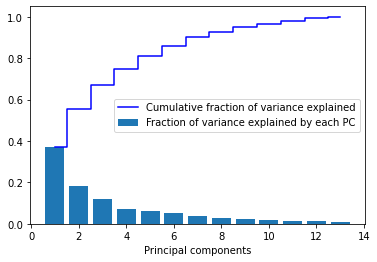

In [4]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_std)

ev = pca.explained_variance_ratio_

with np.printoptions(precision=3):
    print('Fraction of variance explained by each PC =', ev)
    print('Cumulative fraction of variance explained =', np.cumsum(ev))

plt.bar (range(1, 14), ev, label='Fraction of variance explained by each PC')
plt.step(range(1, 14), np.cumsum(ev), where='mid', color='blue', 
         label='Cumulative fraction of variance explained')
plt.xlabel('Principal components')
plt.legend(loc='center right')
plt.show()

In [5]:
print( np.c_[np.round(pca.components_[0],2), winedf.columns[1:]] )

[[-0.14 'Alcohol']
 [0.25 'Malic acid']
 [-0.03 'Ash']
 [0.21 'Alcalinity of ash']
 [-0.15 'Magnesium']
 [-0.39 'Total phenols']
 [-0.42 'Flavanoids']
 [0.31 'Nonflavanoid phenols']
 [-0.31 'Proanthocyanins']
 [0.08 'Color intensity']
 [-0.33 'Hue']
 [-0.37 'OD280/OD315 of diluted wines']
 [-0.3 'Proline']]


### <font color="#0000E0"> Reducing Dimensions to Two: Extracting Two New Features </font>

<div class="alert alert-block alert-info"><font color="#000000">
We will only use the two most important features extracted.
</font></div>

In [6]:
pca = PCA(n_components=2)
pca.fit(X_train_std)
pca.transform(X_train_std)

array([[ 2.38299011,  0.45458499],
       [-1.96578183,  1.65376939],
       [-2.53907598,  1.02909066],
       [-1.43010776,  0.6024011 ],
       [ 3.14147227,  0.66214979],
       [ 0.50253552, -2.08907131],
       [ 0.04867722, -2.27536044],
       [ 2.47888989, -0.08603318],
       [ 2.01900259, -1.3538719 ],
       [ 0.75156583, -2.55367947],
       [ 0.72268915, -1.18404391],
       [-3.00366211,  0.94626934],
       [ 2.57518878, -1.0697549 ],
       [ 3.73151104,  1.01968876],
       [-1.12276518,  0.13877   ],
       [ 2.85996853,  2.28819559],
       [-0.74717125, -3.21746061],
       [-1.58427878,  0.16048055],
       [ 3.38887101,  2.11550689],
       [ 3.15405473,  0.54233966],
       [-1.28036506, -1.72926871],
       [-1.71438911,  0.71745249],
       [-1.55040291, -1.7580591 ],
       [ 1.10984489, -1.20480693],
       [-0.69108418, -1.71385374],
       [-2.086036  , -1.68453671],
       [ 2.90393456,  1.95258805],
       [-2.07635784,  1.47183304],
       [-1.74756185,

<div class="alert alert-block alert-info"><font color="#000000">
PCA is unsupervised dimensionality reduction.  It views the data from a "view point" that sees most of the variance.   If classes are unknown, a clustering analysis can follow to identify clusters (each cluster has data with similar features).
</font></div>

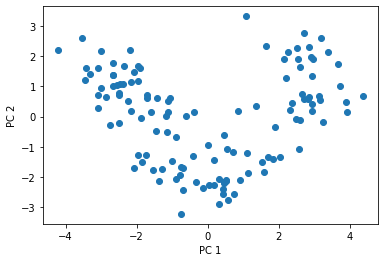

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

### <font color="#0000E0"> Clustering Analysis on Wine Data </font>


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3)  # kmeans model with given number of clusters

kmeans.fit(X_train_std)        # fit the model to the data -- data shiould be standardized or normalized

print('Cluster membership:')
print(kmeans.labels_)          # cluster labels
#print(kmeans.predict(X_train_std))

print('\nNumber of samples in clusters:')
print(pd.Series(kmeans.labels_).value_counts())

centers = kmeans.cluster_centers_
print('\nCluster centers (means):')
with np.printoptions(precision=3):
    for (i,c) in enumerate(centers):
        print('Cluster', i, ':', c)

Cluster membership:
[2 0 0 0 2 1 1 2 1 1 1 0 2 2 0 2 1 0 2 2 1 0 1 1 1 1 2 0 1 2 0 0 2 0 1 0 0 1 2 2 0 2 2 2 0 1 2 2 1 2 1 1 1 0 1 1 2 2 2 0 0 1 2 2 1 0 1 1 1 0 0 1 0 0 2 0 0 2 1 1 2 0 1 0 1 2 2 1 0 0 0 2 1 0 0 1 1 2 2
 0 1 0 1 1 2 0 2 0 1 1 1 1 0 2 0 0 0 0 1 1 2 2 1 1]

Number of samples in clusters:
1    46
0    41
2    37
dtype: int64

Cluster centers (means):
Cluster 0 : [ 0.844 -0.435  0.449 -0.556  0.618  0.936  1.023 -0.533  0.57   0.241  0.646  0.698  1.188]
Cluster 1 : [-0.887 -0.237 -0.451  0.243 -0.486 -0.044  0.07  -0.235  0.164 -0.877  0.319  0.444 -0.708]
Cluster 2 : [ 0.167  0.776  0.063  0.314 -0.081 -0.982 -1.22   0.884 -0.836  0.824 -1.112 -1.325 -0.435]


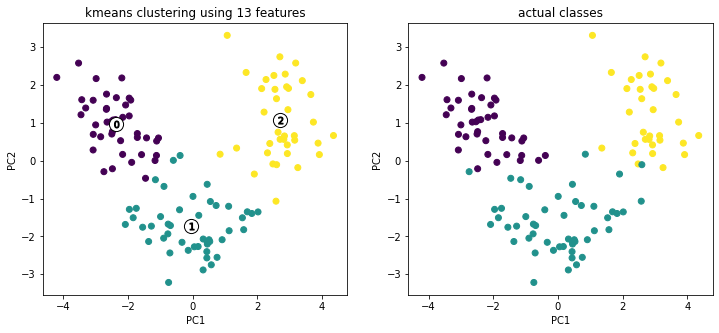

Performance metrics:
  Within-cluster SSE: 883.5469412002899
  Silhouette score:   0.28244652919969465


In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1, xlabel='PC1', ylabel='PC2', title='kmeans clustering using 13 features')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = kmeans.labels_)  # Color the clusters
plt.scatter(pca.transform(centers)[:,0], pca.transform(centers)[:,1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centers):
    plt.scatter(pca.transform(c.reshape(1,-1))[:,0], pca.transform(c.reshape(1,-1))[:,1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

plt.subplot(1,2,2, xlabel='PC1', ylabel='PC2', title='actual classes')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train)         # Color the actual classes
plt.show()

print('Performance metrics:')
print('  Within-cluster SSE:',  kmeans.inertia_)   # Sum of squared distances of samples to their closest cluster center
print('  Silhouette score:  ',  silhouette_score(X_train_std, kmeans.labels_))

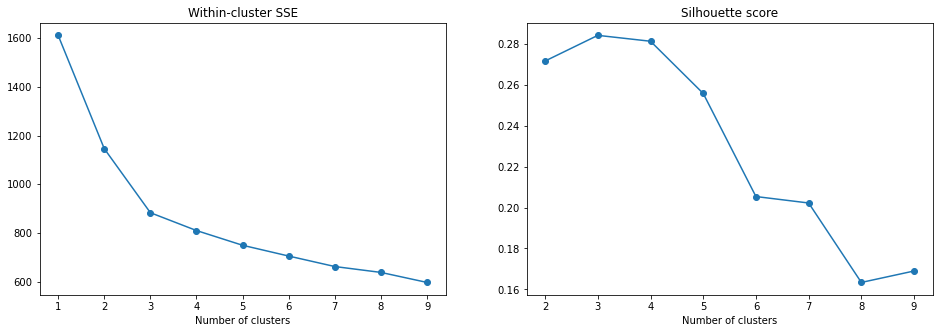

In [10]:
inertia = []
silhouette = []

# specify n_init, number of time the k-means algorithm will run. The final results will be the one with the lowest inertia.
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_train_std)
    
    inertia.append(kmeans.inertia_)
    if k>1: silhouette.append(silhouette_score(X_train_std, kmeans.labels_))

plt.figure(figsize=(16,5))
plt.subplot(1,2,1, xlabel='Number of clusters', title='Within-cluster SSE')
plt.plot(range(1,10), inertia, marker='o')

plt.subplot(1,2,2, xlabel='Number of clusters', title='Silhouette score')
plt.plot(range(2,10), silhouette, marker='o')
plt.show()

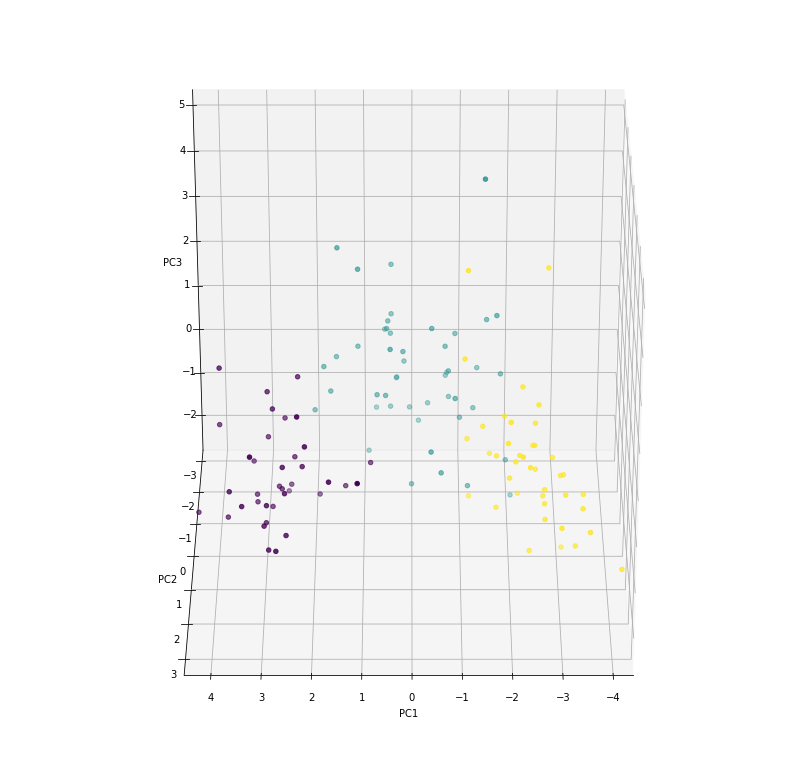

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

kmeans = KMeans(n_clusters=3) 
kmeans.fit(X_train_std)

X_pca = pca.fit_transform(X_train_std)

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],  c = kmeans.labels_)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.margins(0.0)
ax.view_init(30, 90)
plt.show()


In [12]:
%matplotlib qt

fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c = kmeans.labels_)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.margins(0.0)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.002)
    
%matplotlib inline